# Analysis on the cost of treatment of different patients

## Medical Cost Datasets: 
### About data

The dataset contains the following columns and each column tells about specify information of patient.

- age: age of patient

- sex: gender of patient - female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance

- smoker: Smoking or not

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

## Analysis and Visualization

In [ ]:
# importing modules
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# reading dataset
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# description about data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# checking for null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# label encoding categorical data so we have numerical labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# sex
print(data.sex.drop_duplicates(), '\n')
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)

# smoker or not
print(data.smoker.drop_duplicates(), '\n')
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)

# region
print(data.region.drop_duplicates(), '\n')
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

print(data.head())

0    female
1      male
Name: sex, dtype: object 

0    yes
1     no
Name: smoker, dtype: object 

0    southwest
1    southeast
3    northwest
8    northeast
Name: region, dtype: object 

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


In [ ]:
# description about data
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [ ]:
# Correlation between columns
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [ ]:
# taking correlation with charges column only
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

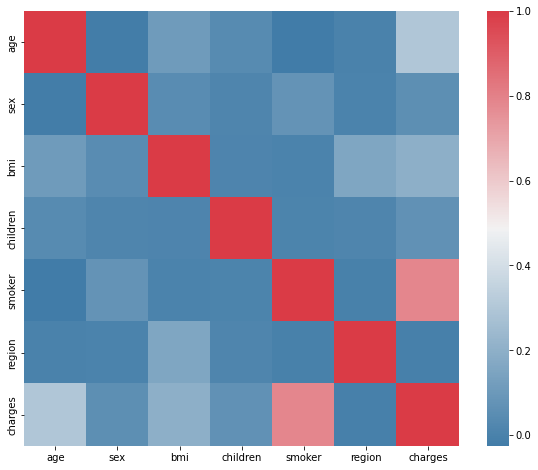

In [ ]:
# creating heatmap of the correlation
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True), square=True, ax=ax)

Conclusion: A strong correlation is observed between smoking and charges showing patient is charged more if he is smoking.

**Analysis on charges**

Mean of charges: 13270.422265141257
Median of charges: 9382.033


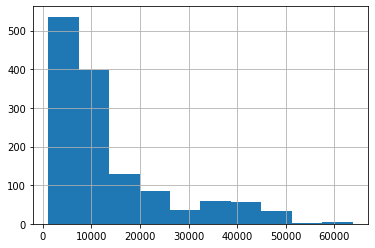

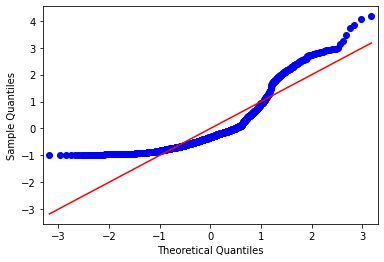

In [ ]:
print("Mean of charges:", data.charges.mean())
print("Median of charges:", data.charges.median())
hist = data.charges.hist()
plt.show()
from statsmodels.graphics.gofplots import qqplot
dt = (data["charges"]-data["charges"].mean())/data["charges"].std()
qqplot(dt, line='s')
plt.show()

Conclusion: Data is not normally distributed.

([<matplotlib.patches.Wedge at 0x7f0885d44a50>,
 [Text(-0.9601119635212646, 0.7198506911181946, 'non-smoker'),
  Text(0.9601119635212645, -0.7198506911181947, 'smoker')],
 [Text(-0.560065312054071, 0.4199129031522801, '80%'),
  Text(0.5600653120540708, -0.41991290315228014, '20%')])

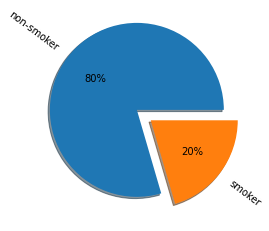

In [ ]:
# getting count of smokers and non-smokers
smoker_count = data.smoker.value_counts()
plt.pie(smoker_count,
        labels=["non-smoker", "smoker"],
        autopct='%.0f%%', 
        explode=(0.1, 0.1),
        shadow='True',
        rotatelabels = 'true')

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

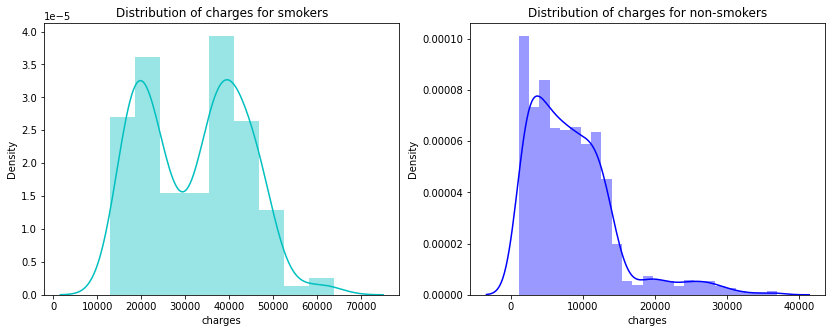

In [ ]:
f= plt.figure(figsize=(14,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"], color='c', ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'], color='b', ax=ax)
ax.set_title('Distribution of charges for non-smokers')

Conclusion: Looking at the plot we can say that the smoking patients spend more on treatment.

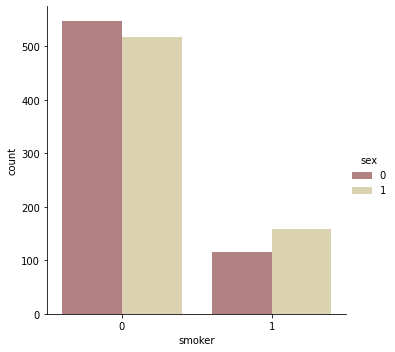

In [ ]:
# checking the count of smoking and non-smoking patients
sns.catplot(x="smoker", kind="count", hue = 'sex', palette="pink", data=data)
# women - 0, men - 1
# smoker - 1, non-smoker - 0

Conclusion: The number of smokers are less than non-smoker. Also men smoker are more than women smokers. 

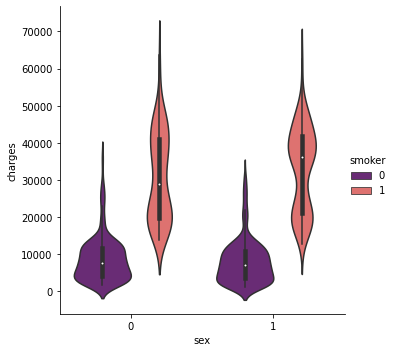

In [ ]:
sns.catplot(x="sex", y="charges", hue="smoker", kind="violin", data=data, palette ='magma')

Conclusion: The total cost of treatment in smokers is more than non-smokers for both the genders. Women are charged less than men.

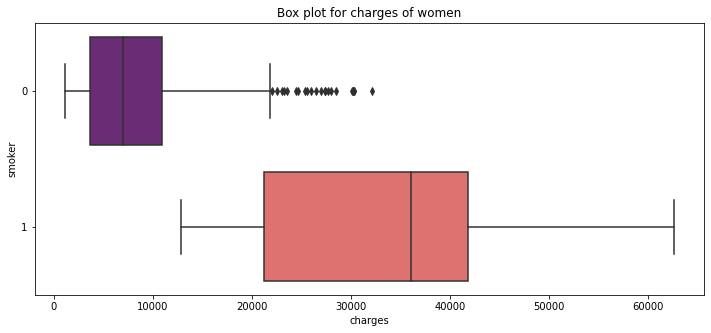

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'magma')

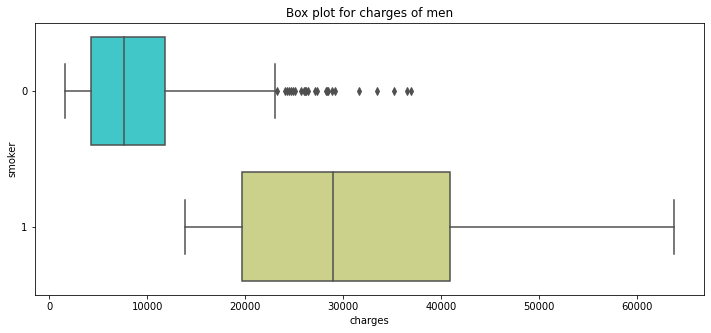

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

**Analysis on charges wrt age of patient.**

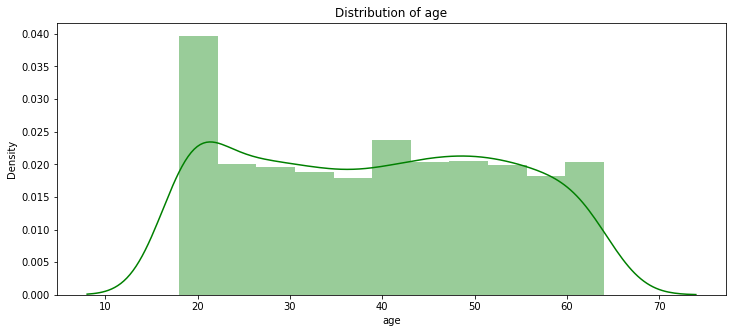

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

Conclusion: The age of patients varies from 18 to 65. In the age group between 18 to 22 has most number of patients.

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

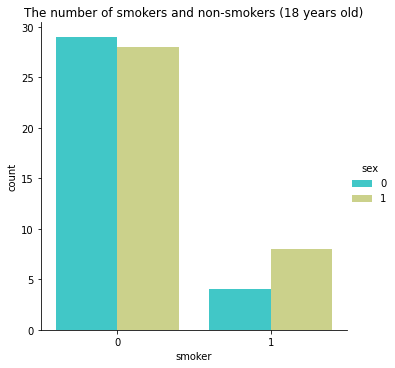

In [ ]:
# exploring charges for the patients of age 18.
sns.catplot(x="smoker", kind="count", hue = 'sex', palette="rainbow", data=data[(data.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

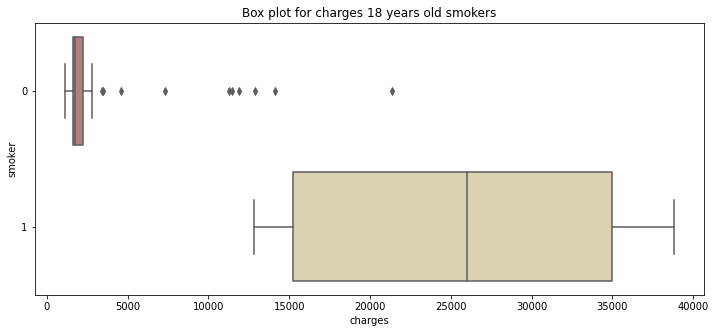

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')

Conclusion: Even at the age of 18 smokers spend much more on treatment than non-smokers.

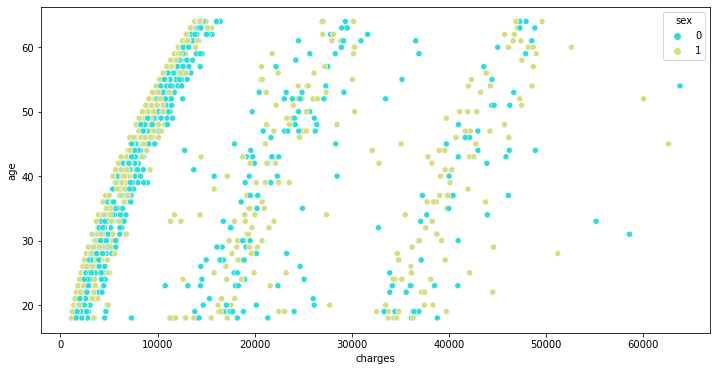

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=data, x='charges', y='age', hue='sex', palette="rainbow")

Text(0.5, 1.0, 'Smokers and non-smokers')

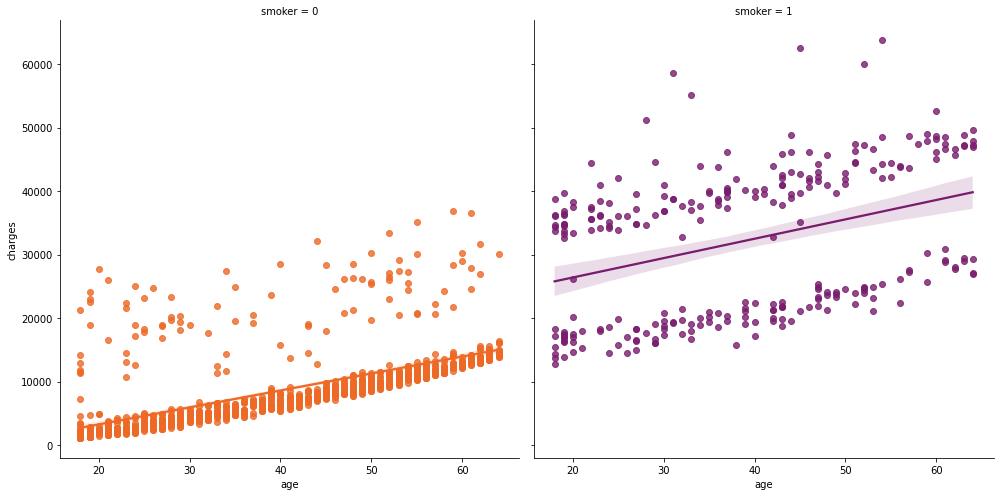

In [ ]:
sns.lmplot(x="age", y="charges", hue="smoker", col='smoker', data=data, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')

Conclusion: In non-smokers, the cost of treatment increases with age. 

**Analysis of charges wrt bmi**

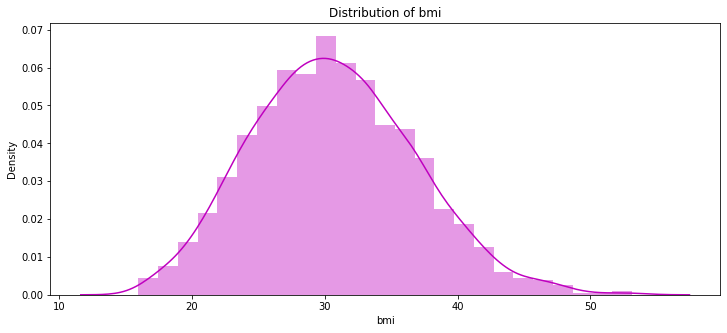

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

Conclusion: Data is normally distributed with mean of 30.

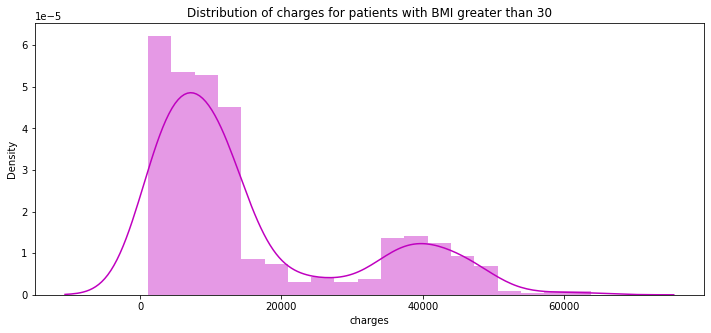

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

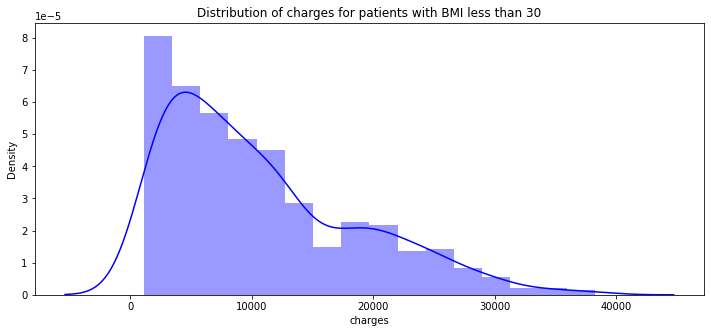

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

Conclusion: Patients with BMI above 30 spend more on treatment.

Text(0.5, 1.0, 'Scatter plot of charges and bmi')

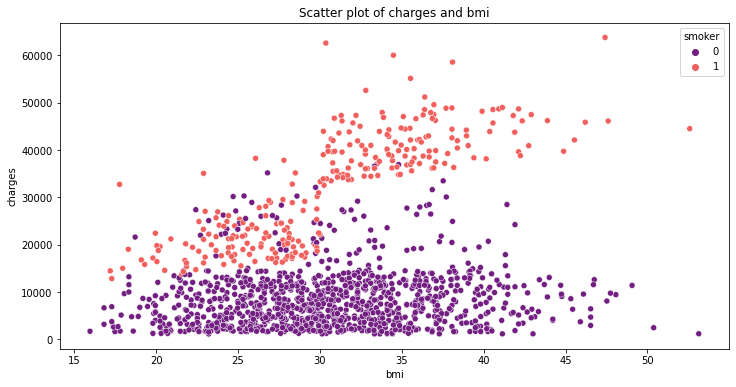

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(x='bmi', y='charges', data=data,palette='magma', hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

### Conclusion of the dataset: 
Patients who smoke, whose bmi is greater than 30 and male patient spend more money on treatment.